In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 16. Clase 21: Transformada z</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Función de transferencia $H(z)$ y función zplane en Python

> + Esta función toma el numerador y denominador de representación de polinomios de la función de transferencia $H(z):$

$$
\begin{align*}
H(z) & = \frac{b_{0} + b_{1}z^{-1} + \ldots + b_{M}z^{-M}}{a_{0} + a_{1}z^{-1} + \ldots + a_{N}z^{-N}}
\end{align*}
$$

> + La función *zplane* plotea en el plano complejo z, los polos y ceros de $H(z).$

> + El **orden** de la función entre polinomios se define como el máximo entre el orden de su numerador y el de su denominador. 

> + Así, el orden de un filtro LTI es el orden de su función de transferencia.  

> + Los arreglos *b_{k}* y *a_{k}* se ordenan desde el coeficiente más bajo al más alto.

> + Ejemplo 1:

$$
\begin{align*}
H(z) & = \frac{z^{-1} + z^{-2}}{1 + \frac{1}{4}z^{-1} - \frac{3}{8}z^{-2}}
\end{align*}
$$

> + Ejemplo 2:

$$
\begin{align*}
H(z) & = \frac{z}{\left(z - 0.5\right)\left(z + 0.75 \right)}
\end{align*}
$$

> + Ejemplo 3:

$$
\begin{align*}
H(z) & = \frac{z^{2} - 1.9 z + 1}{z^{2} - 1.8 z + 0.9}
\end{align*}
$$

In [2]:
import numpy as np
import utils
import cmath
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib notebook

In [3]:
# Ejemplo 1:

> + Definimos:

$$
\begin{align*}
H(z) & = \frac{z^{-1} + z^{-2}}{1 + \frac{1}{4}z^{-1} - \frac{3}{8}z^{-2}}\\
     & = \frac{z^{-2}\left( z + 1\right)}{z^{-2}\left( z^{2} + \frac{1}{4}z -\frac{3}{8}\right)}\\
     & = \frac{ z + 1}{\left( z^{2} + \frac{1}{4}z -\frac{3}{8}\right)}
\end{align*}
$$


In [4]:
b = [0, 1, 1]
polos = np.roots(b)
print('Los polos son:', polos)

Los polos son: [-1.]


In [5]:
a = [1, 1/4, -3/8]
ceros = np.roots(a)
print('Los ceros son:', ceros)

Los ceros son: [-0.75  0.5 ]


<IPython.core.display.Javascript object>


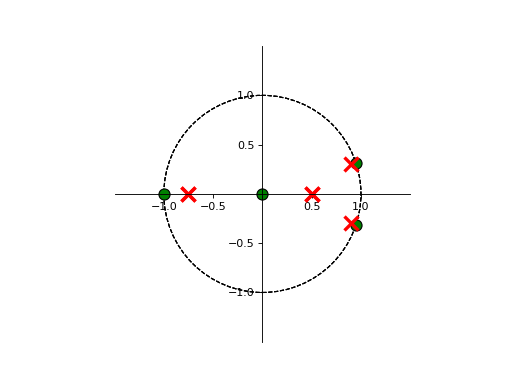

(array([-1.]), array([-0.75,  0.5 ]), 1.0)

In [6]:
utils.zplane(b,a)

In [7]:
# Ejemplo 2:

> + Definimos:

$$
\begin{align*}
H(z) & = \frac{z}{\left( z^{2} + \frac{1}{4}z -\frac{3}{8}\right)}
\end{align*}
$$

In [8]:
b = [0, 1, 0]
polos = np.roots(b)
print('Los polos son:', polos)

Los polos son: [0.]


In [9]:
a = [1, 1/4, -3/8]
ceros = np.roots(a)
print('Los ceros son:', ceros)

Los ceros son: [-0.75  0.5 ]


In [10]:
utils.zplane(b,a)

/home/kasparov/Documentos/20190114_vpoblete/20200418_DSP_AUTUM_2020/CLASES/Clase_21/def/utils.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0.]), array([-0.75,  0.5 ]), 1.0)

In [11]:
# Ejemplo 3:

> + Definimos:

$$
\begin{align*}
H(z) & = \frac{z^{2} - 1.9 z + 1}{z^{2} - 1.8 z + 0.9}
\end{align*}
$$

In [12]:
b = [1, -1.9, 1]
polos = np.roots(b)
print('Los polos son:', polos)

Los polos son: [0.95+0.3122499j 0.95-0.3122499j]


In [13]:
a = [1, -1.8, 0.9]
ceros = np.roots(a)
print('Los ceros son:', ceros)

Los ceros son: [0.9+0.3j 0.9-0.3j]


In [14]:
utils.zplane(b,a)

/home/kasparov/Documentos/20190114_vpoblete/20200418_DSP_AUTUM_2020/CLASES/Clase_21/def/utils.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0.95+0.3122499j, 0.95-0.3122499j]), array([0.9+0.3j, 0.9-0.3j]), 1.0)

 ### Frecuencia de prueba
 
> + Probemos una frecuencia de 1000 Hz.
 
> + Suponer que la frecuencia de muestreo es 44100 Hz, lo que corresponde a una vuelta completa alrededor del círculo unitario.
 
> + Encontremos el valor complejo para este punto en el plano z:

In [15]:
f = 1000
fs = 44100
Ts = 1 / fs
w = 2*np.pi*(f/fs)
freq = np.exp(1j*w)
print(freq)

(0.9898674727799416+0.14199431795762676j)


### Calculemos la distancia desde el punto de frecuencia a los ceros:

In [16]:
ceros_uno = ceros[0]
ceros_dos = ceros[1]
dist_uno = freq - ceros_uno
dist_dos = freq - ceros_dos

#print(dist_uno)

mag_dist_uno = np.abs(dist_uno)
mag_dist_dos = np.abs(dist_dos)


print("las distancias desde 1000 Hz a los ceros son:")
print(mag_dist_uno)
print(mag_dist_dos)

las distancias desde 1000 Hz a los ceros son:
0.18177447076399136
0.4510378473816598


### Ploteamos:

<IPython.core.display.Javascript object>


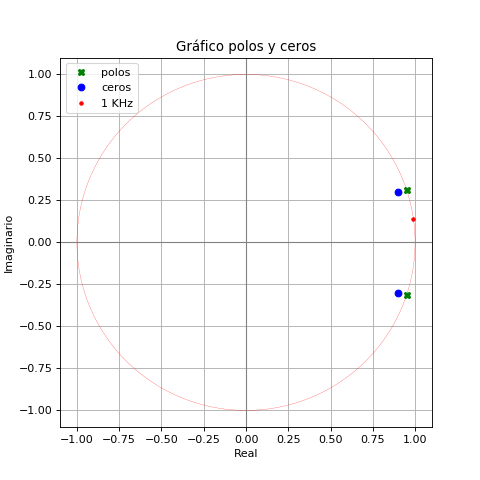

In [17]:
# Reset default params
#sns.set()

# Set context to paper | talk | notebook | poster
# sns.set_context("poster")

fig = plt.figure(figsize=(6,6))  # sets size and makes it square
ax = plt.axes()                  # ax.set_aspect(1)

# plot unit circle

theta = np.linspace(-np.pi, np.pi, 201)
plt.plot(np.sin(theta), np.cos(theta), color = 'red', linewidth=0.2)

# plot x-y axis

ax.axhline(y=0, color='gray', linewidth=1)
ax.axvline(x=0, color='gray', linewidth=1)

# plot poles and zeros

plt.plot(np.real(polos), np.imag(polos), 'Xg', label = 'polos')
plt.plot(np.real(ceros), np.imag(ceros), 'ob', label = 'ceros')

w = 2*np.pi*(f / fs)
freq = np.exp(1j*w)

plt.plot(np.real(freq), np.imag(freq), '.r', label = '1 KHz')

plt.title("Gráfico polos y ceros")
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.legend(loc='upper left')

plt.grid()
plt.show()

### Ploteamos desde 0 to 44.100 Hz, que es lo mismo que ir desde $0$ a $2\pi$.

<IPython.core.display.Javascript object>


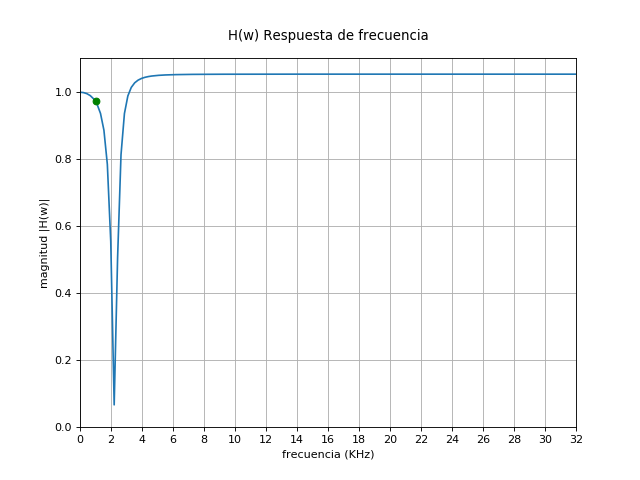

In [18]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# H(z) = b/a

b = [1, -1.9, 1]
a = [1, -1.8, 0.9] 

# create w array which travels around unit circle

w = np.linspace(0, 2*np.pi, 201)    # for evauluating H(w)
z = np.exp(1j*w)
f = np.linspace(0, 44.1, 201) 

# evalue H over the w array

H = np.polyval(b, z) / np.polyval(a, z)

# plot the magnitude of H vs frequency.  H is a complex number array.

plt.plot(f, np.absolute(H))

# plot frequency point

sample = 44.1 # KHz
freq = 1 # KHz
angle = (freq/sample) * 2 * np.pi
frequency = np.exp(1j*angle)

Hf = np.polyval(b, frequency) / np.polyval(a, frequency)
Hf = np.absolute(Hf)
plt.plot(freq, Hf, 'og')

plt.title("H(w) Respuesta de frecuencia",y=1.03)
plt.xlabel("frecuencia (KHz)")
plt.ylabel("magnitud |H(w)|");
plt.xlim(0, 32)
plt.xticks(np.linspace(0, 32, 17))   # I want every 2 KHz
plt.ylim(ymin=0)                     # let ymax auto scale
plt.grid()
